In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-whitegrid')
%matplotlib inline
import pickle
from collections import defaultdict
import pprint

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.set_option('max_rows', 10)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', -1)
# pd.set_option('display.width', 150)

In [2]:
# import warnings
# # warnings.filterwarnings("ignore")

In [3]:
# # Change format of charts to .svg
%config InlineBackend.figure_format = 'svg'

In [4]:
%xmode Plain

Exception reporting mode: Plain


In [5]:
# df = pd.read_csv('data/clean_data_encoded_for_regression.csv')
df = pd.read_csv('data/clean_data.csv')

### Use Linear Regression to predict how much customers should be paying

In [9]:
X2 = df[['phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'internet_service-fiber_optic',
       'internet_service-no']]

y2 = df['monthly_charges']

In [10]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=22)

In [11]:
lr = LinearRegression()
lr.fit(X2_train, y2_train)
predictions = lr.predict(X2_test)

In [12]:
lr.score(X2_test, y2_test)

0.9988439352255011

#### Wow! This was a surprising and unexpected result. It looks like the cost of services is nearly 100% linear.

In [13]:
pprint.pprint(list(zip(lr.coef_, X2.columns)))

[(20.08378486653323, 'phone_service'),
 (5.018101012264406, 'multiple_lines'),
 (5.01675664433352, 'online_security'),
 (5.00829451553906, 'online_backup'),
 (5.017429324933872, 'device_protection'),
 (5.0187511375416225, 'tech_support'),
 (9.948721531305289, 'streaming_tv'),
 (9.983518501523525, 'streaming_movies'),
 (24.931873024096635, 'internet_service-fiber_optic'),
 (-25.063604203055803, 'internet_service-no')]


predicted_charges = lr.predict(X2)

In [14]:
df['predicted_monthly_charges'] = lr.predict(X2)

In [15]:
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check,predicted_monthly_charges
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,29.850000,0,0,0,0,0,1,0,29.938510
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,55.573529,0,0,1,0,0,0,1,55.048187
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,54.075000,0,0,0,0,0,0,1,55.039052
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,40.905556,0,0,1,0,0,0,0,39.983153
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,75.825000,1,0,0,0,0,1,0,69.945874


In [16]:
df['predicted_minus_actual_monthly_charges'] = df['monthly_charges'] - df['predicted_monthly_charges']

### Testing testing 123

In [ ]:
import sklearn.metrics

In [ ]:
sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])
param_grid = [{'clf__C': [1, 1.1, 1.2, 1.3, 1.5, 1.6], 'clf__class_weight': [None, 'balanced'], 'clf__solver': ['liblinear', 'sag', 'saga']}]
gs = GridSearchCV(pipe, param_grid, cv=5, scoring='recall', n_jobs=-1)
gs.fit(X_train, y_train)

In [ ]:
gs.best_score_

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_estimator_.steps

In [ ]:
X2 = df[['phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'internet_service-fiber_optic',
       'internet_service-no']]

y2 = df['monthly_charges']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=28)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X2_train, y2_train)

In [ ]:
predictions = lr.predict(X2_test)

In [ ]:
lr.score(X2_test, y2_test)

In [ ]:
pprint.pprint(list(zip(lr.coef_, X2.columns)))

predicted_charges = lr.predict(X2)

In [ ]:
df['predicted_monthly_charges'] = lr.predict(X2)

In [ ]:
df.head()

In [ ]:
df['predicted_minus_actual_monthly_charges'] = df['monthly_charges'] - df['predicted_monthly_charges']

In [ ]:
df['predicted_minus_actual_monthly_charges'].describe()

### Other ways to feature engineer...

In [21]:
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,avg_monthly_charges
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,29.850000
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,55.573529
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,54.075000
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,40.905556
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,75.825000


In [24]:
# Total revenue per month, all customers
df['total_charges'].sum()

16056168.700000001

In [26]:
df[df['churn'] == 1]['total_charges'].sum()

2862926.9

In [27]:
# Total revenue per month, all customers
df['monthly_charges'].sum()

455661.0

In [28]:
df[df['churn'] == 1]['monthly_charges'].sum()

139130.85

In [29]:
139130.85/455661.0

0.30533850823309433

In [31]:
df['avg_monthly_charges'].mean()

64.79942354538711

#### Looking at number of people who churned by contract type (as well as internet service)

In [61]:
print(df.groupby(['contract'])['churn'].value_counts())

contract        churn
Month-to-month  0        2220
                1        1655
One year        0        1306
                1        166 
Two year        0        1637
                1        48  
Name: churn, dtype: int64


In [40]:
print(df.groupby(['contract', 'internet_service'])['churn'].value_counts())

contract        internet_service  churn
Month-to-month  DSL               0        829 
                                  1        394 
                Fiber optic       1        1162
                                  0        966 
                No                0        425 
                                          ...  
Two year        DSL               1        12  
                Fiber optic       0        398 
                                  1        31  
                No                0        628 
                                  1        5   
Name: churn, Length: 18, dtype: int64


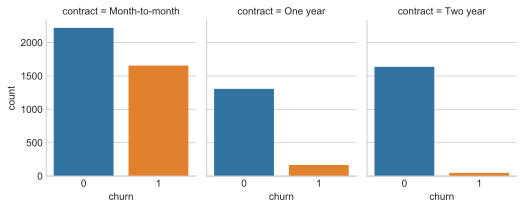

In [48]:
g = sns.catplot('churn', col='contract', data=df, kind='count', height = 3, aspect=0.8, hue_order=['g', 'b'])

#### DSL users are more likely to stay, Fiber optic users are more likely to switch

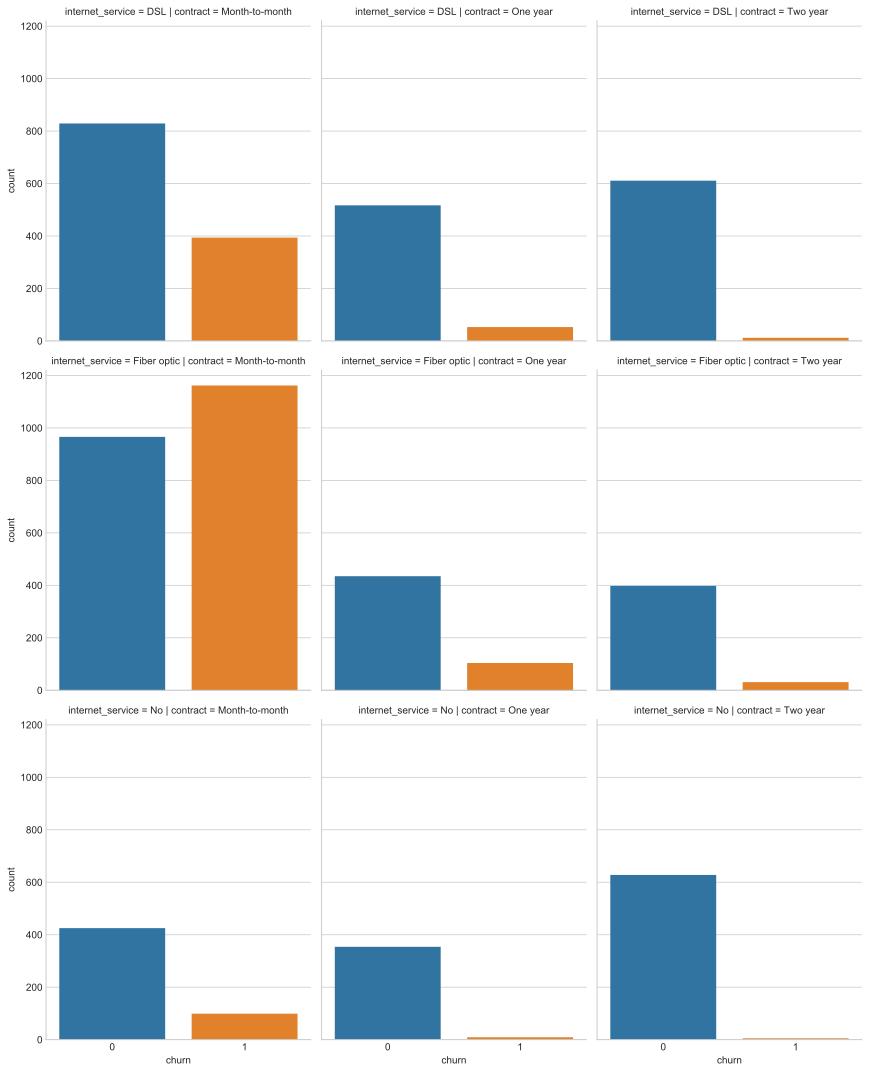

In [60]:
g = sns.catplot('churn', col='contract', row='internet_service', data=df, kind='count', aspect=0.8)

In [83]:
len(years)

11

In [87]:
months = list(range(0,13,1))

# Monthly revenue decreases by 27% each year due to churn if we do nothing
monthly_rev = [455661]
for i in range(1,13):
    print(i)
    monthly_rev.append(monthly_rev[-1] * .73)
    

1
2
3
4
5
6
7
8
9
10
11
12


In [88]:
len(monthly_rev)

13

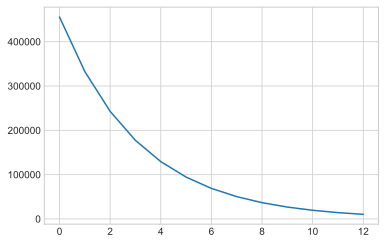

In [92]:
fig, ax = plt.subplots()
# ax.set_xticks(range(0,13))
plt.plot(months, monthly_rev)

In [16]:
df[df['churn'] == 1]['monthly_charges'].sum()

139130.85

In [12]:
df.columns

Index(['gender', 'senior', 'partner', 'dependents', 'tenure', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn', 'avg_monthly_charges'],
      dtype='object')